In [ ]:
# Install YOLOv8
!pip install ultralytics roboflow

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/112.6 GB disk)


In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="fu47PieMNjRBfh5WDiZT")
project = rf.workspace("roushan-kumar-jfa3j").project("ppe_automate")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Automate-1 in yolov11:: 100%|██████████| 3047/3047 [00:00<00:00, 6930.79it/s]


In [ ]:
dataset.location

'/content/PPE_Automate-1'

In [ ]:
!yolo task=detect model=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=650

WARNING ⚠️ 'mode' argument is missing. Valid modes are frozenset({'track', 'predict', 'export', 'val', 'benchmark', 'train'}). Using default 'mode=train'.
100% 5.35M/5.35M [00:00<00:00, 95.7MB/s]
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/PPE_Automate-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=650, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, aug

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

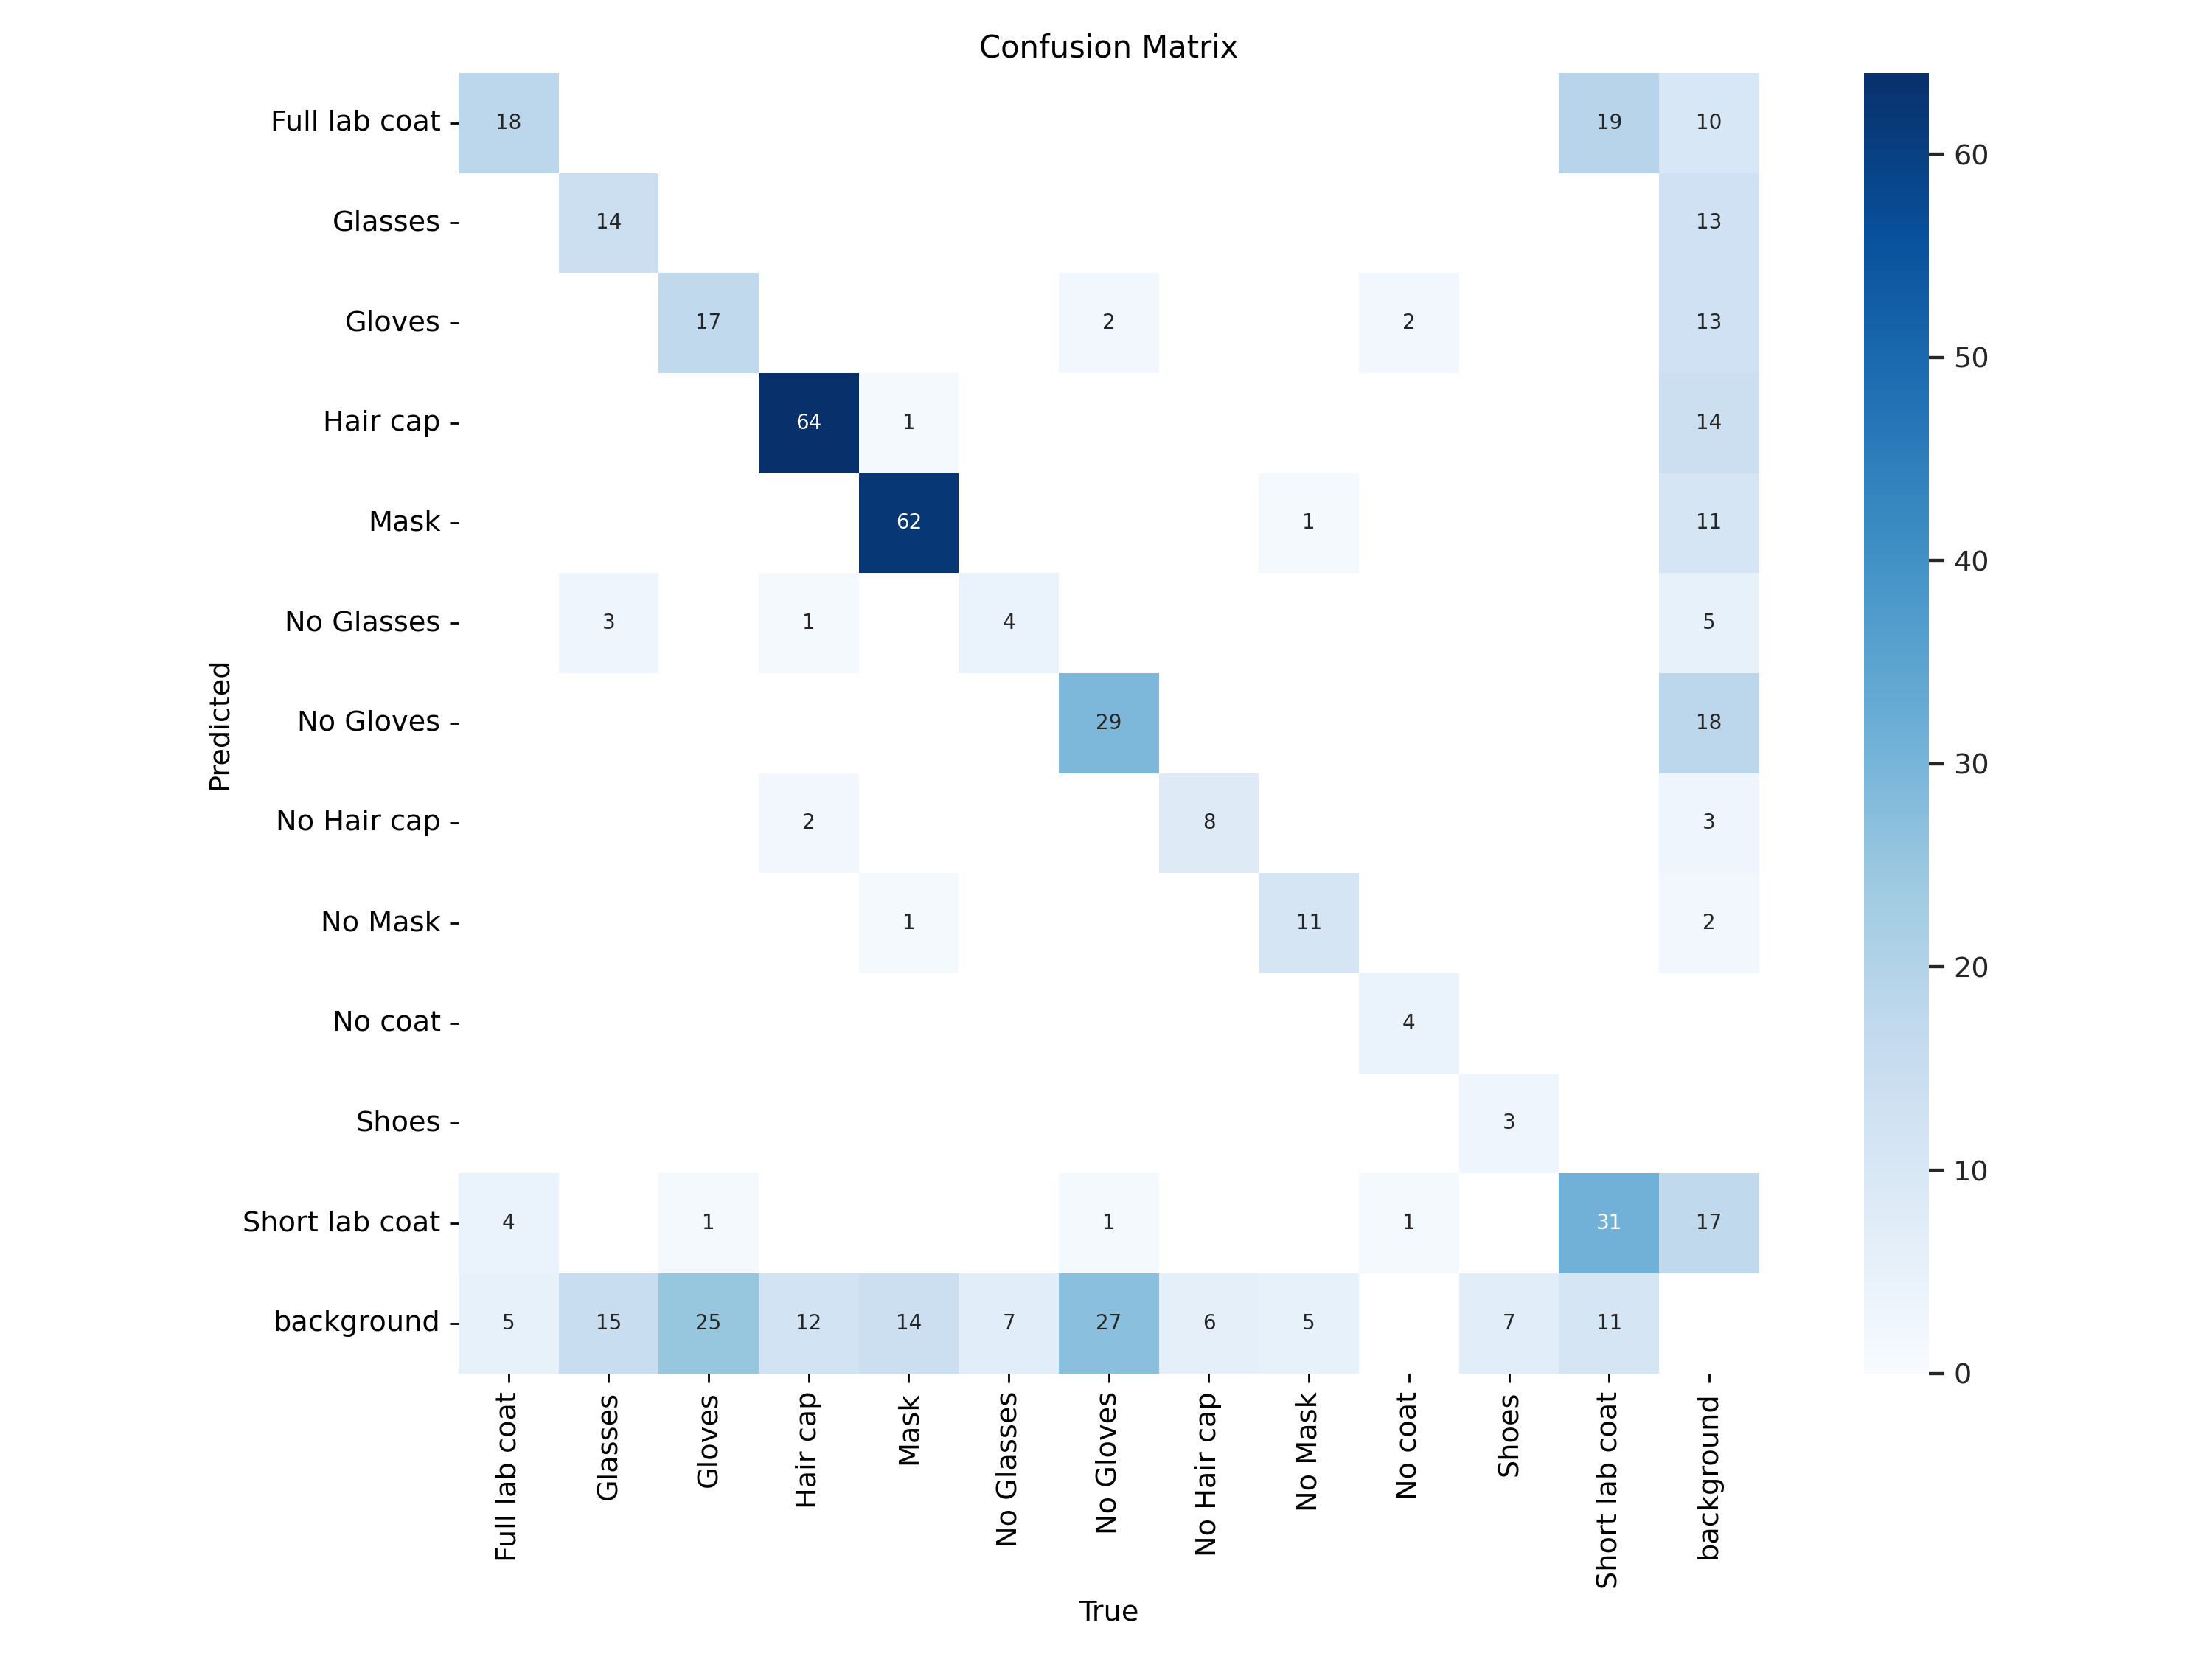

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png",width=600)

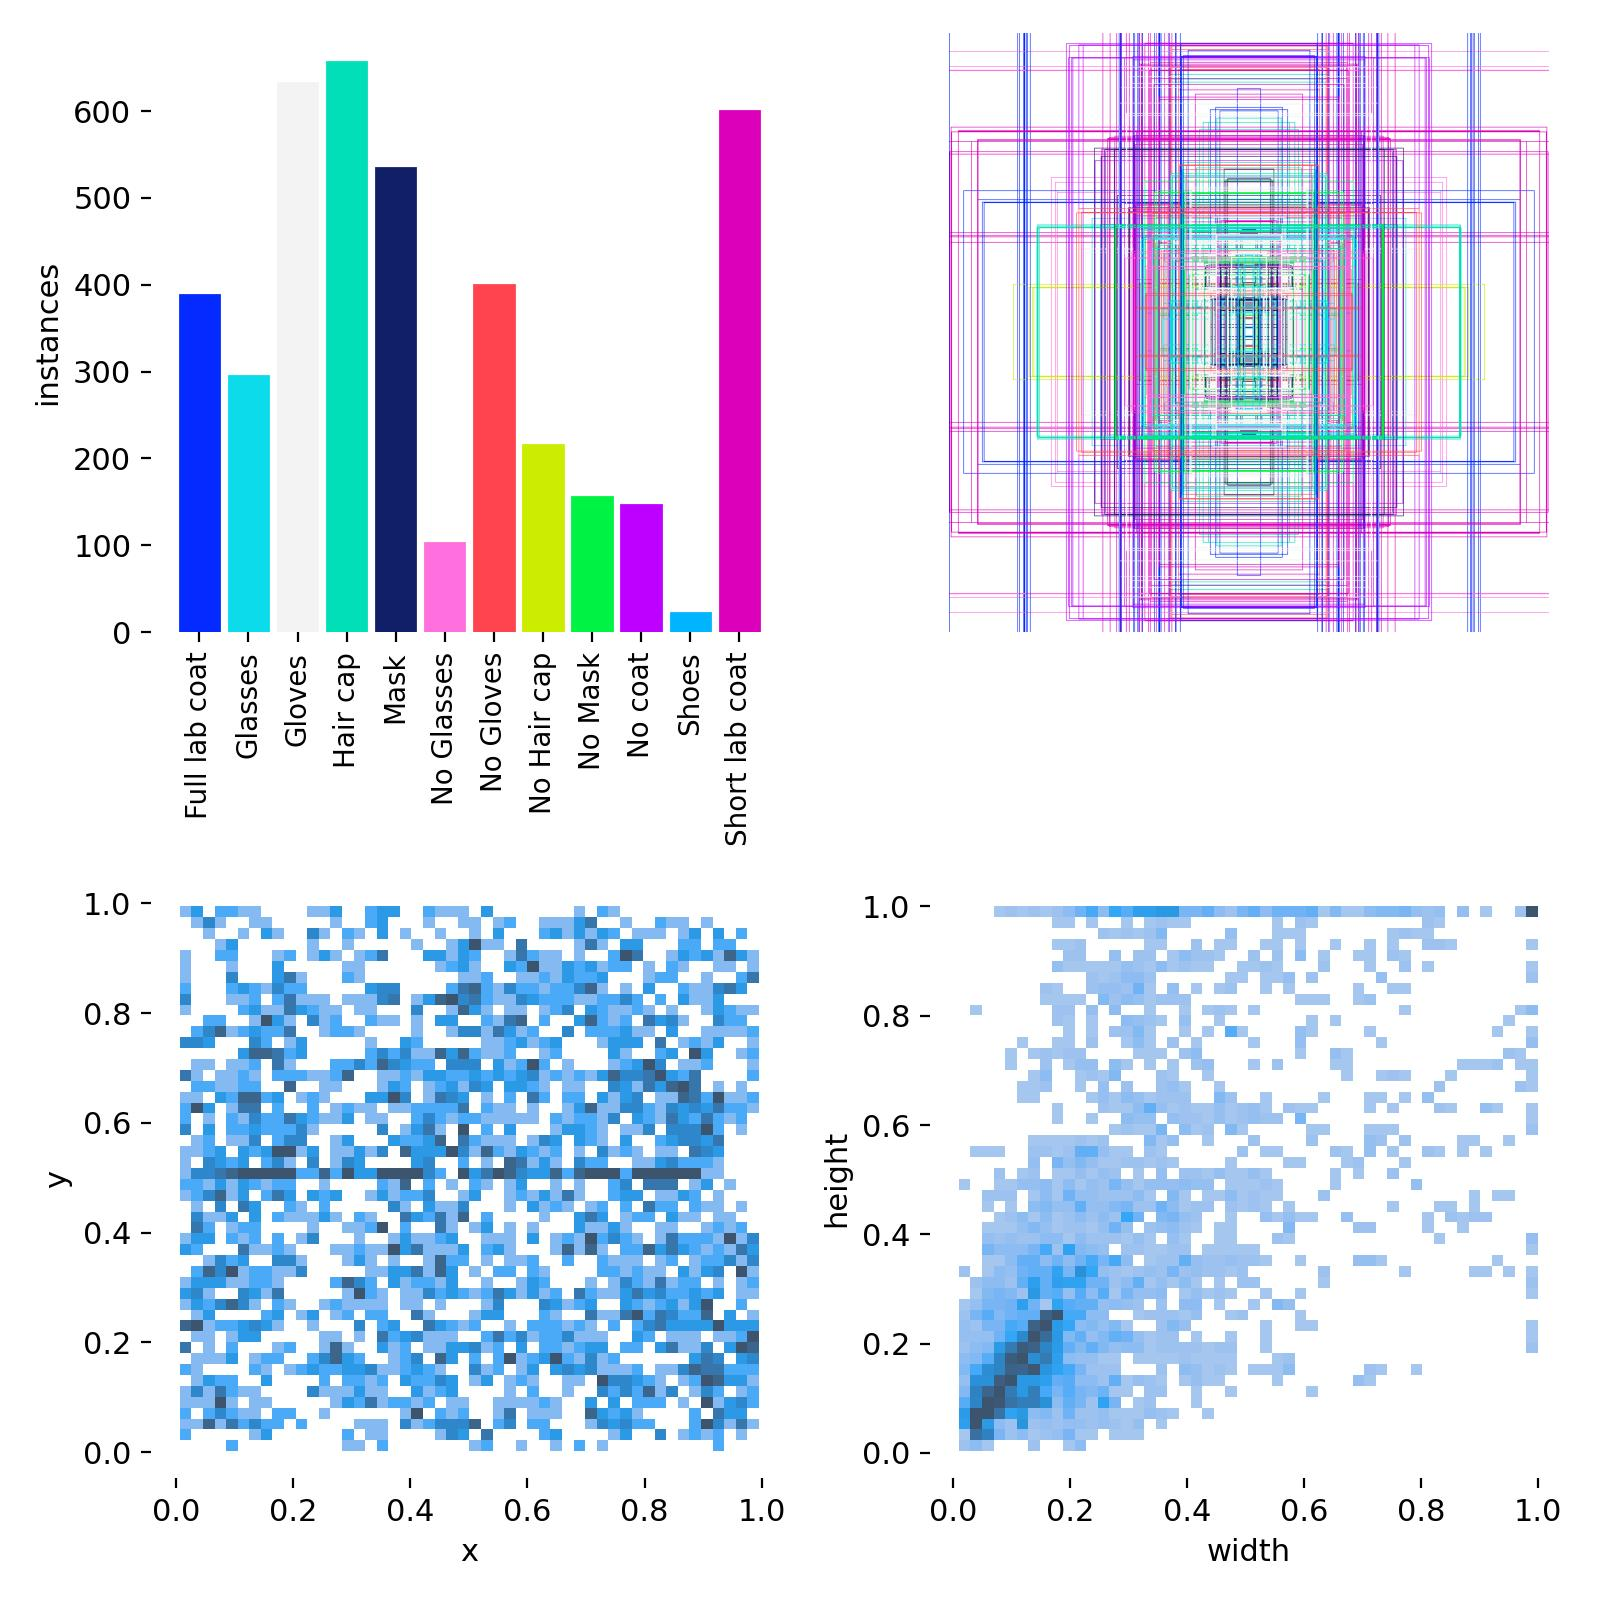

In [ ]:
Image("/content/runs/detect/train/labels.jpg",width=600)

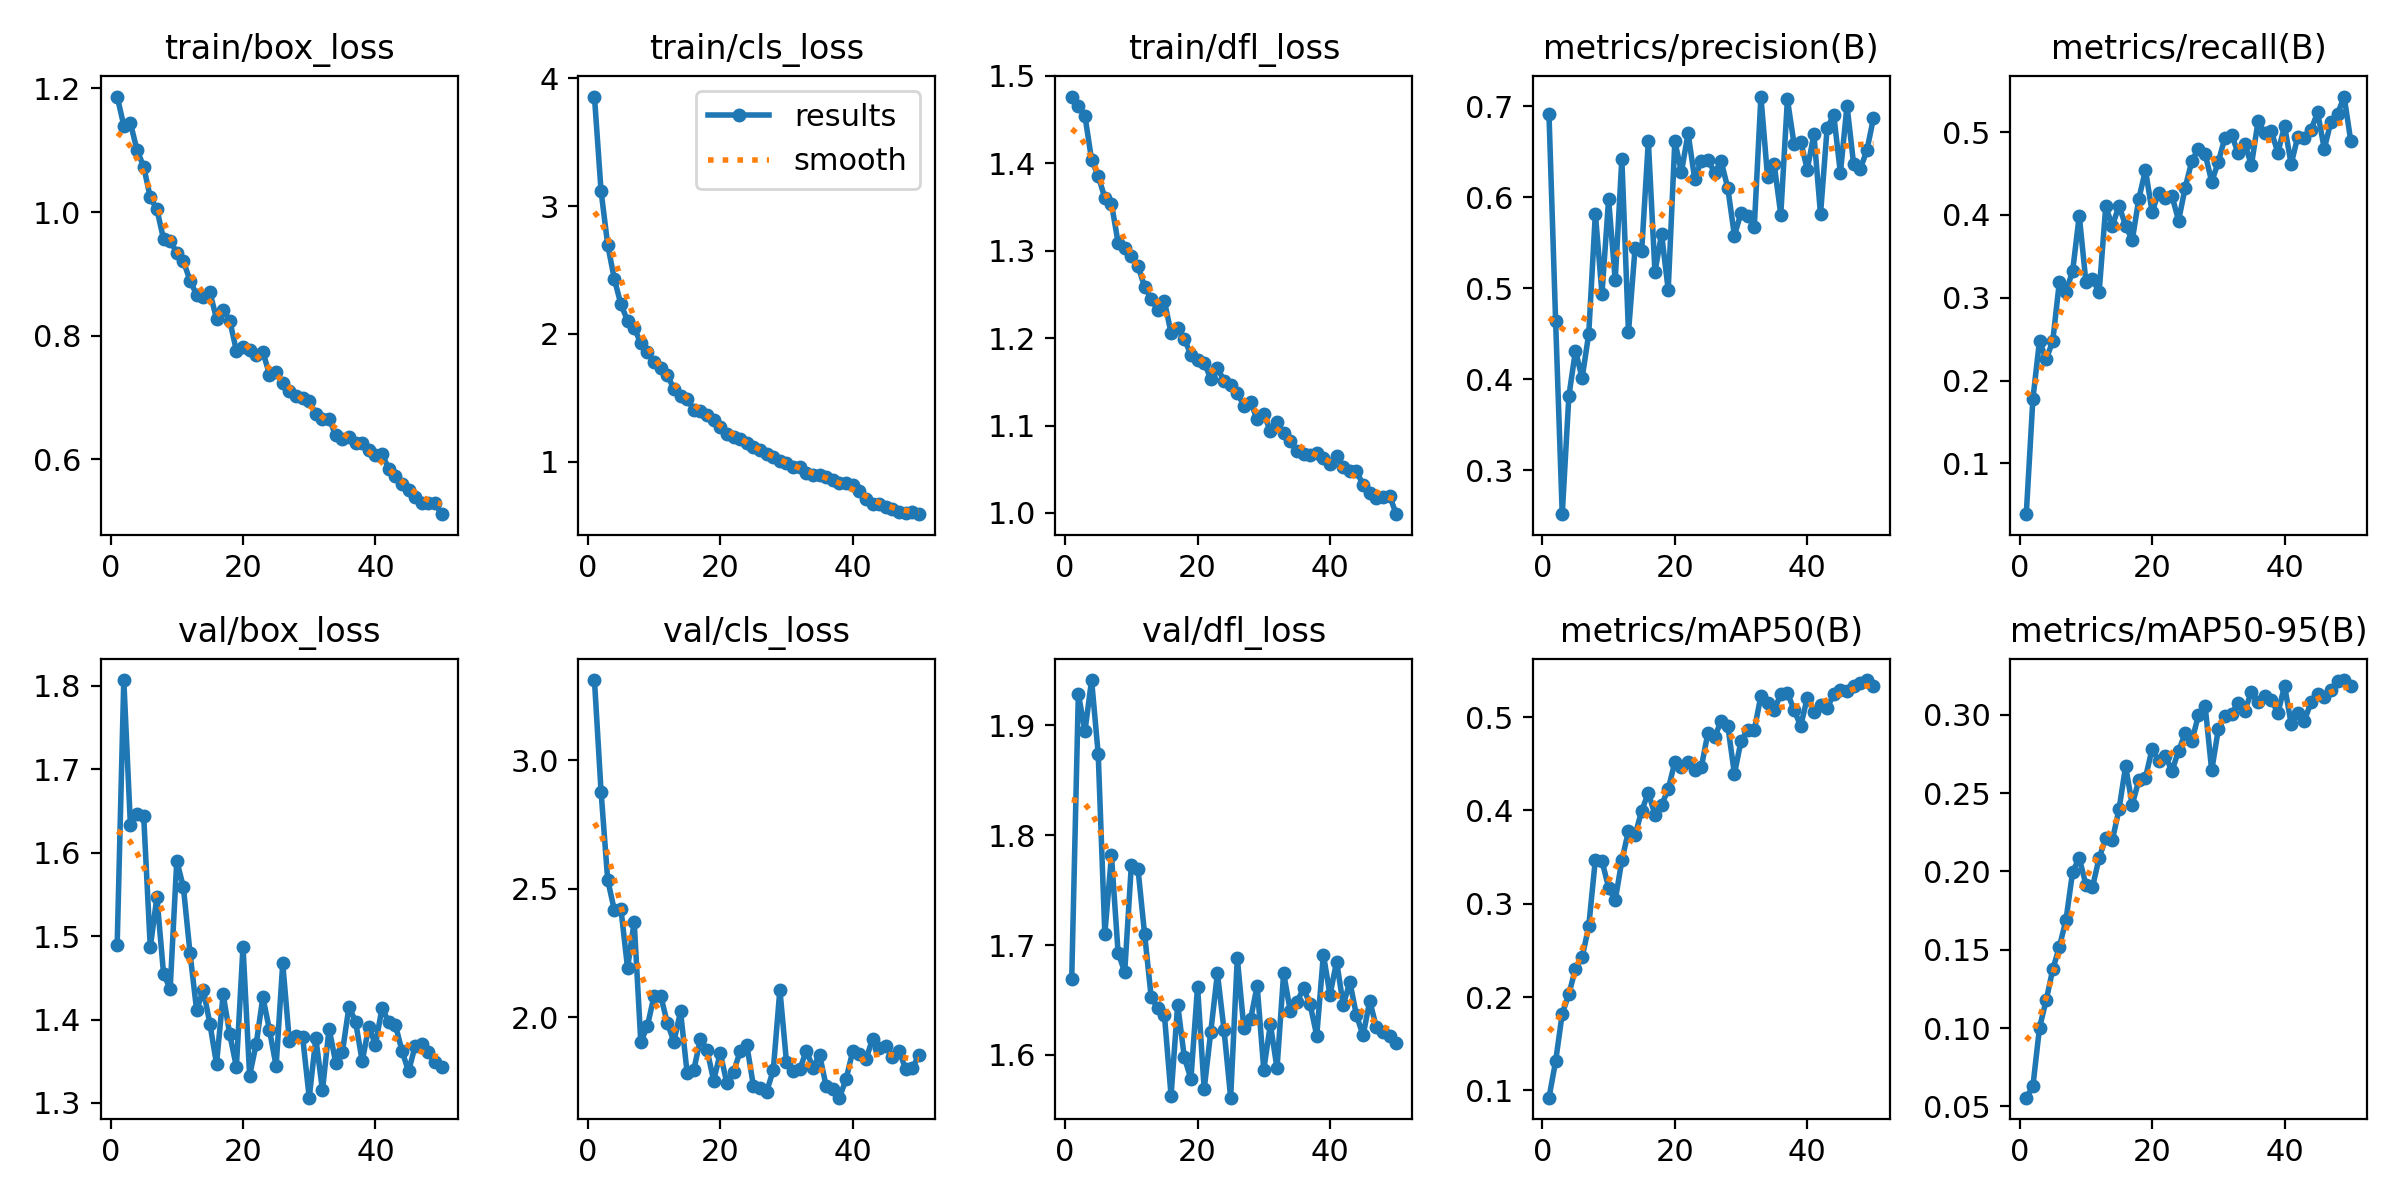

In [ ]:
Image("/content/runs/detect/train/results.png",width=600)

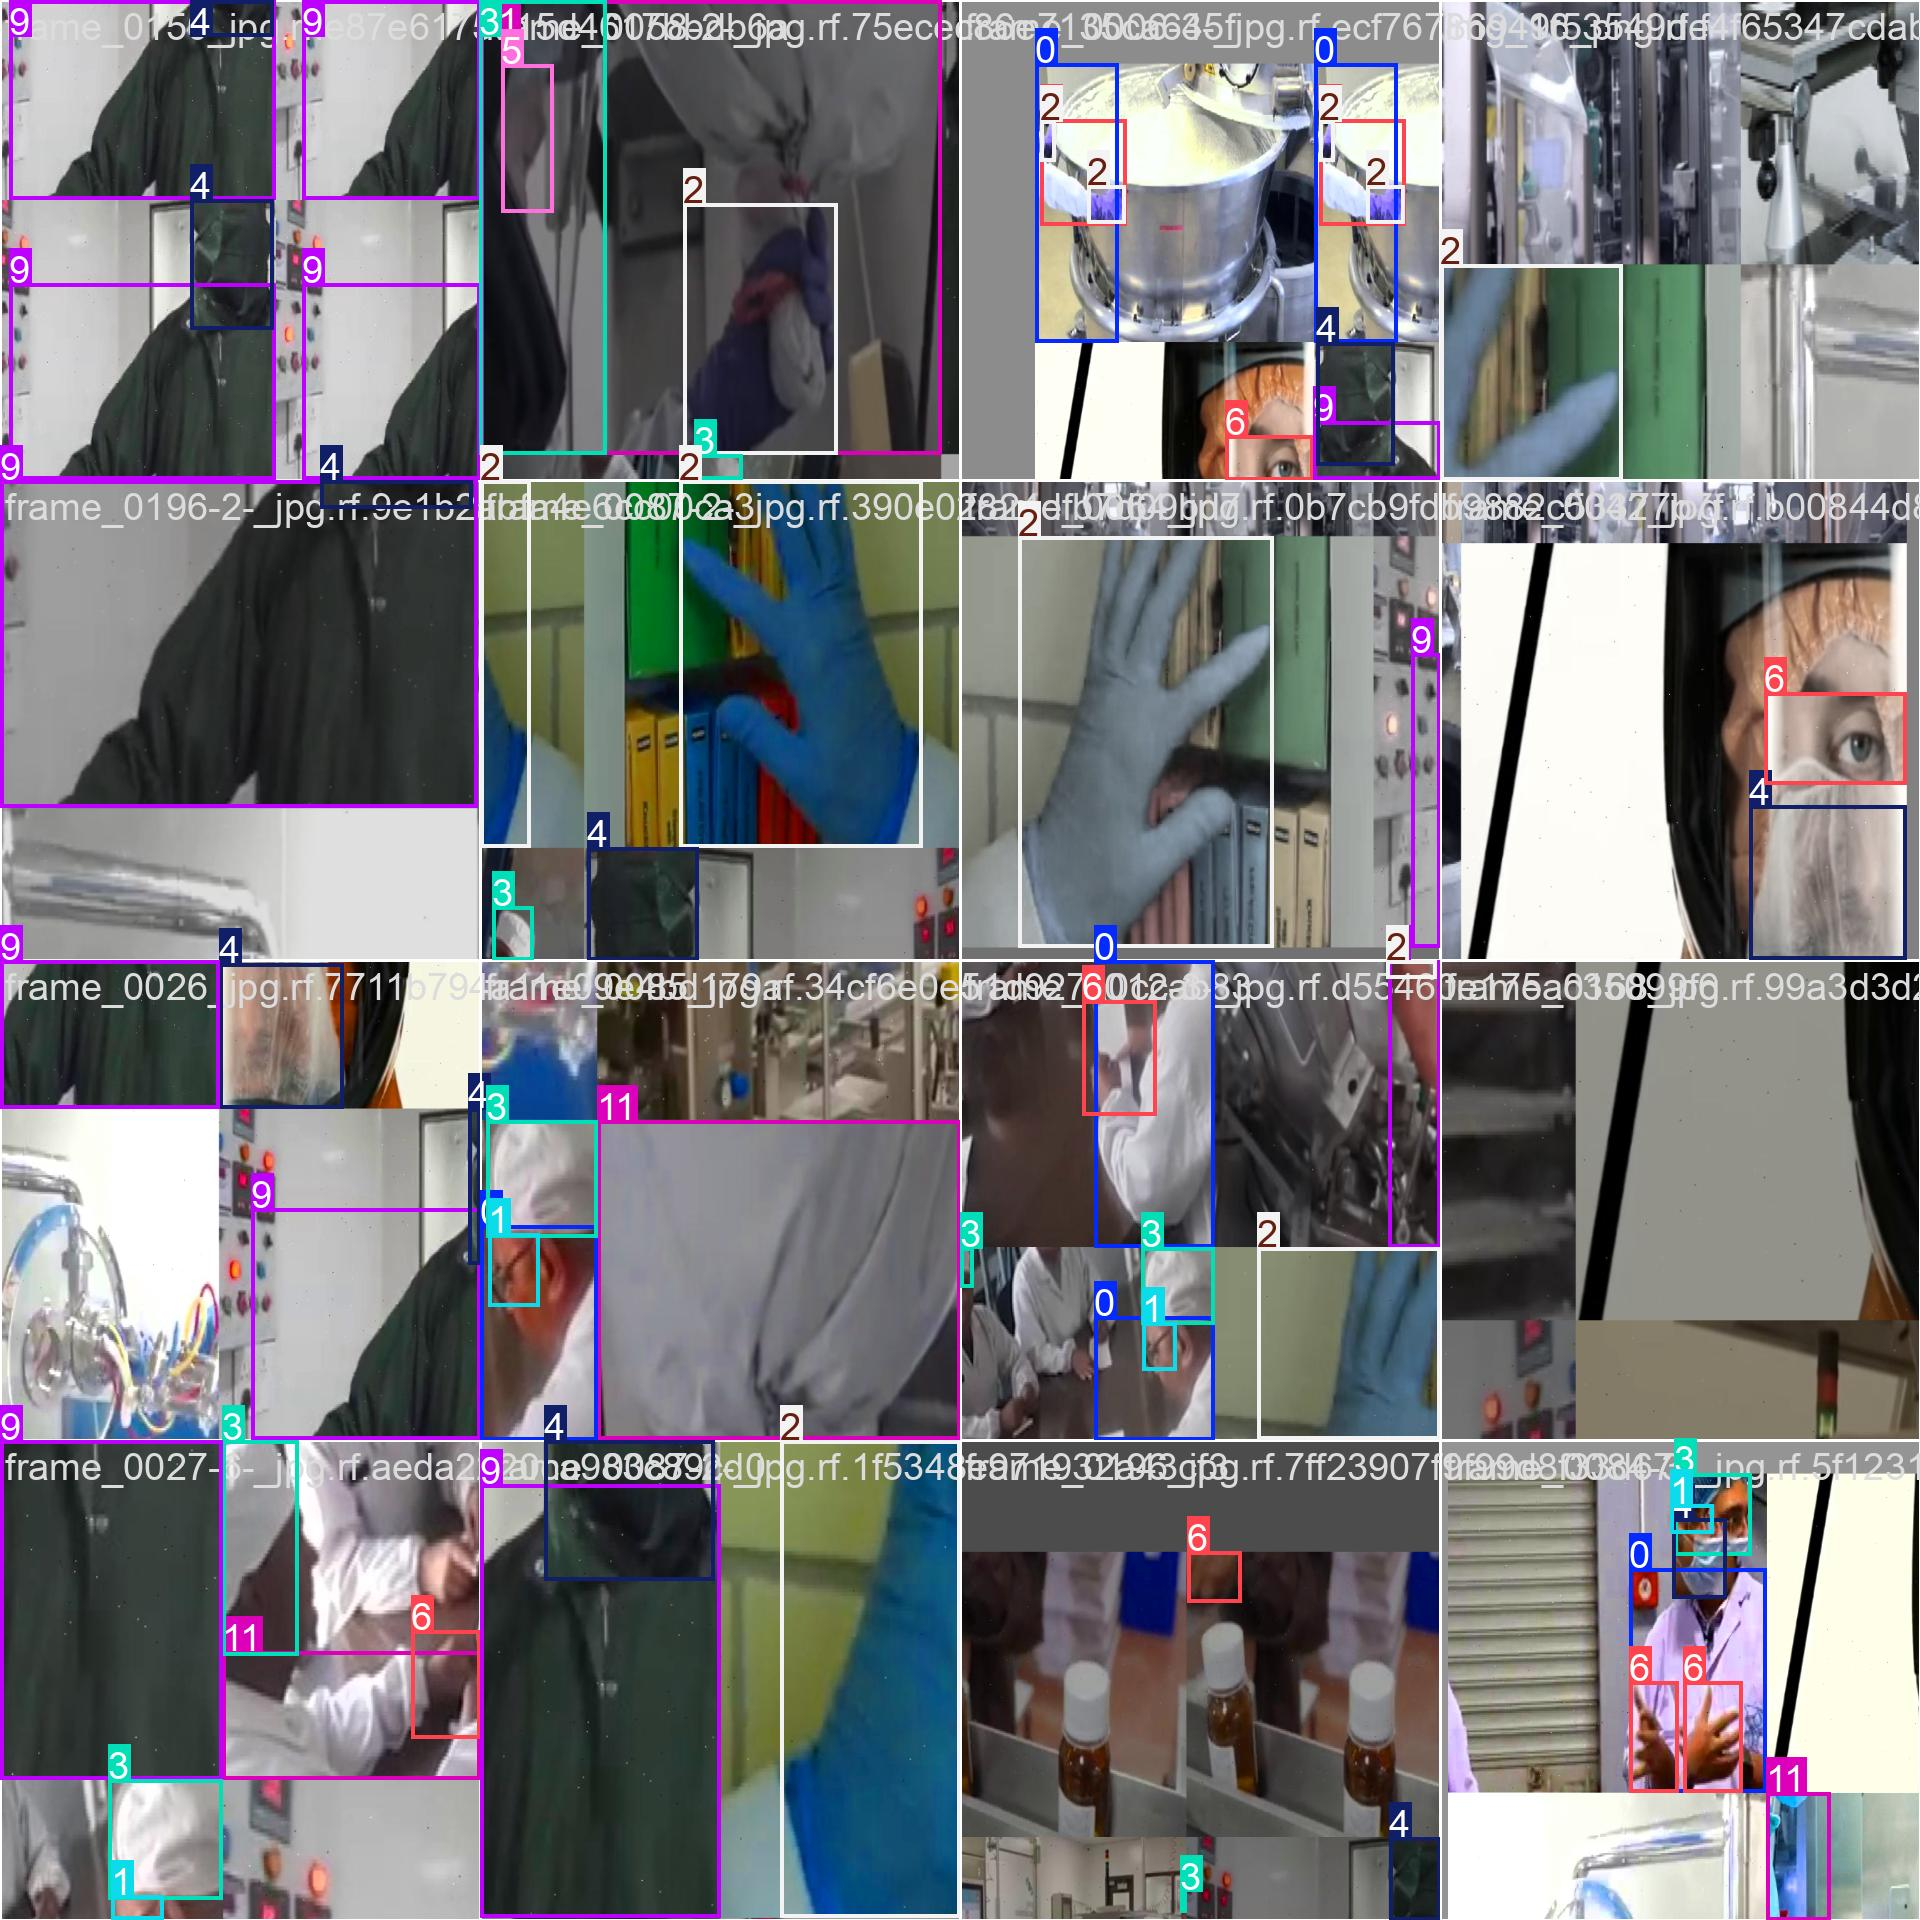

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg",width=600)

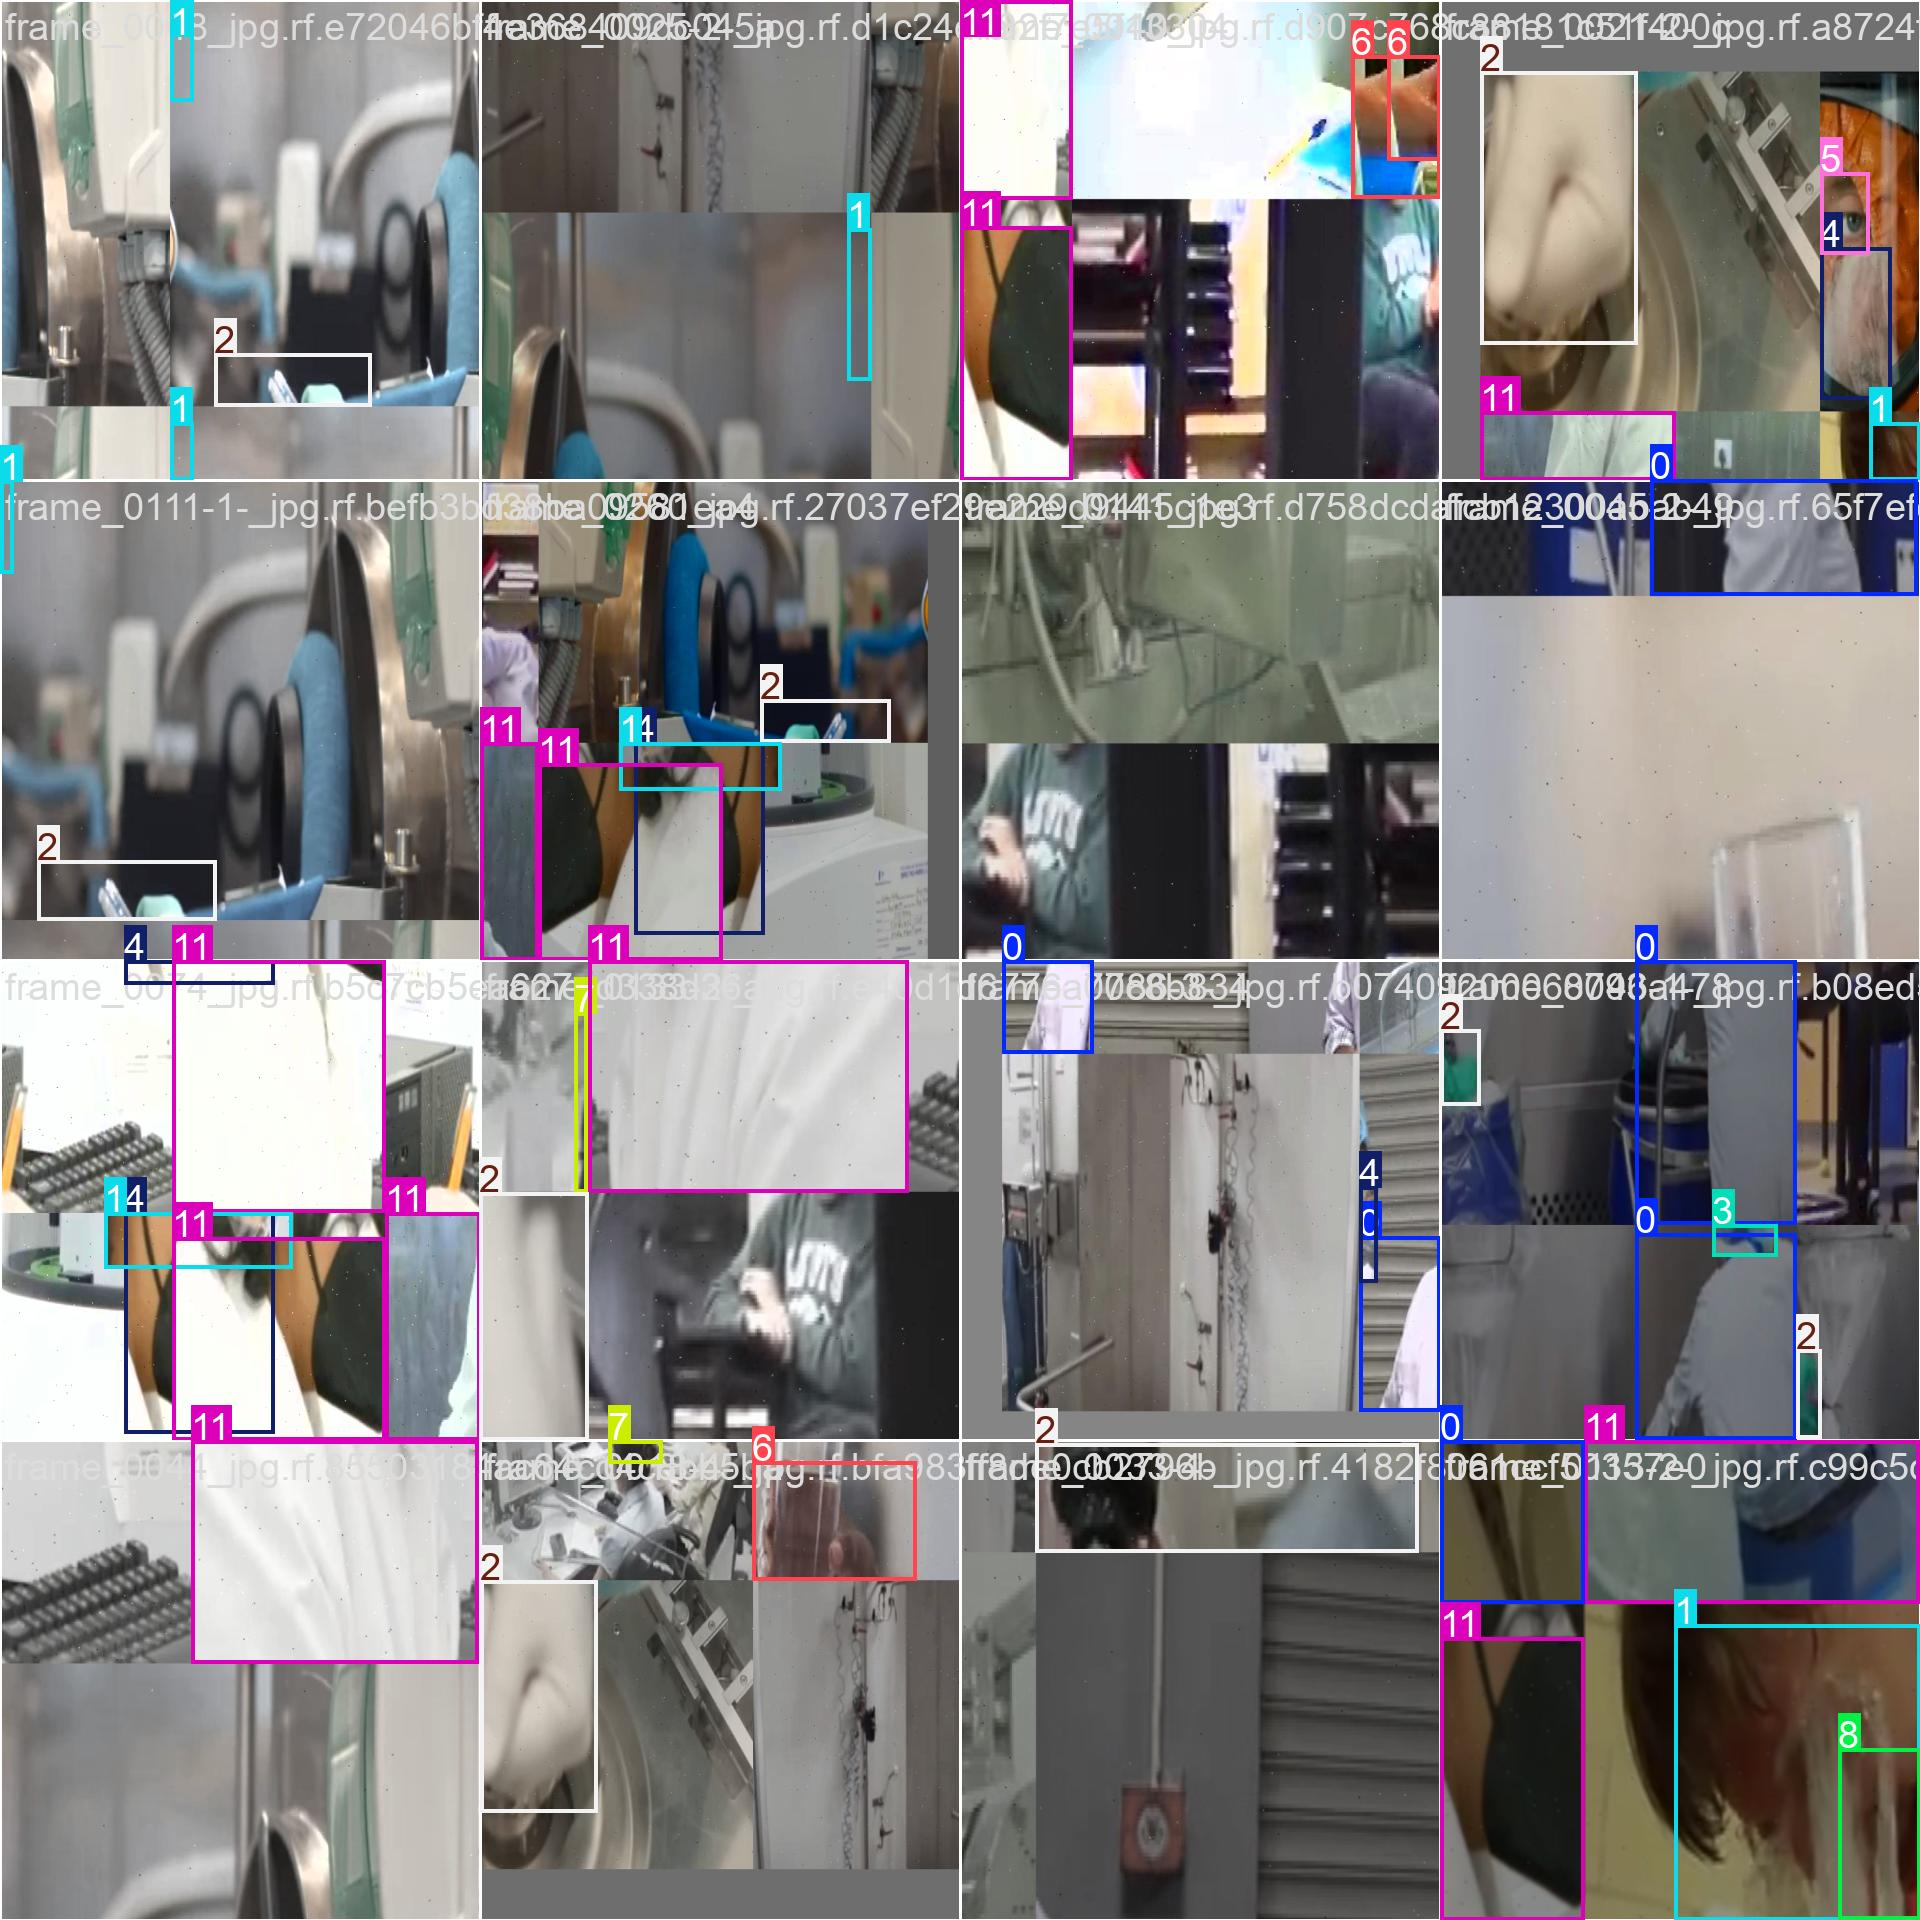

In [ ]:
Image("/content/runs/detect/train/train_batch1.jpg",width=600)

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/PPE_Automate-1/valid/labels.cache... 130 images, 13 backgrounds, 0 corrupt: 100% 130/130 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:02<00:00,  3.02it/s]
                   all        130        438      0.651      0.543       0.54      0.323
         Full lab coat         25         27      0.401      0.704       0.43      0.274
               Glasses         32         32      0.558      0.473       0.47      0.289
                Gloves         31         43      0.534      0.395      0.395      0.248
              Hair cap         57         79      0.795      0.785       0.86      0.691
                  Mask         55         78       0.83      0.782      0.831       0.62
            No Glasses         11         11    

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source=image_2.jpg save=True

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/image_2.jpg: 352x672 2 Glassess, 1 Gloves, 1 No Hair cap, 1 Short lab coat, 47.7ms
Speed: 4.0ms preprocess, 47.7ms inference, 139.0ms postprocess per image at shape (1, 3, 352, 672)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


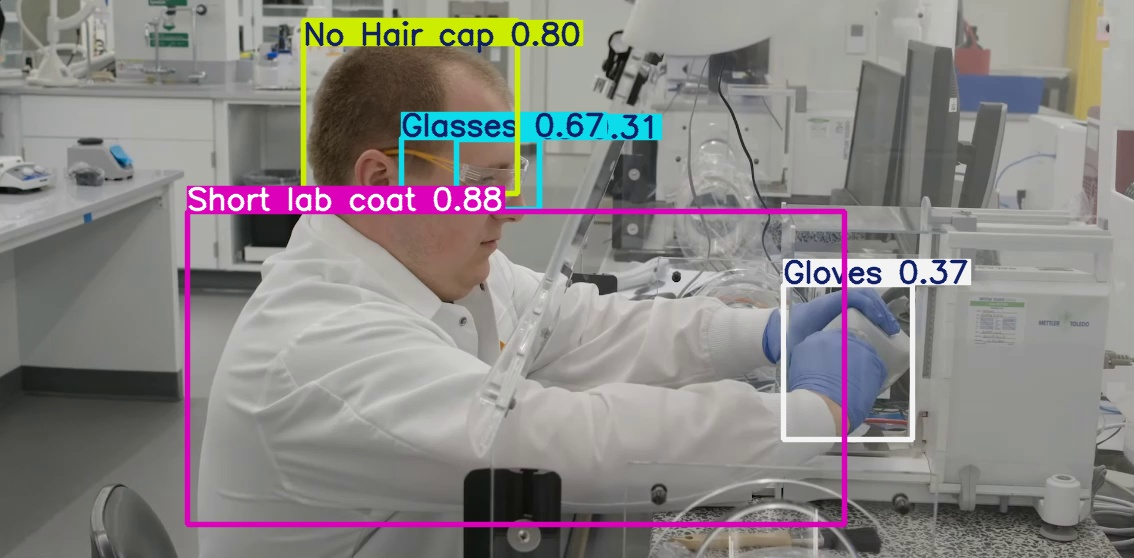

In [ ]:
#Image Detection

Image("/content/runs/detect/predict2/image_2.jpg",width=600)

In [ ]:
#Vedio Detection

!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/Vedio_01.mp4" save=True

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/3856) /content/Vedio_01.mp4: 352x672 2 Glovess, 41.8ms
video 1/1 (frame 2/3856) /content/Vedio_01.mp4: 352x672 2 Glovess, 10.1ms
video 1/1 (frame 3/3856) /content/Vedio_01.mp4: 352x672 1 Gloves, 9.8ms
video 1/1 (frame 4/3856) /content/Vedio_01.mp4: 352x672 (no detections), 8.7ms
video 1/1 (frame 5/3856) /content/Vedio_01.mp4: 352x672 1 Gloves, 9.0ms
video 1/1 (frame 6/3856) /content/Vedio_01.mp4: 352x672 1 Gloves, 9.3ms
video 1/1 (frame 7/3856) /content/Vedio_01.mp4: 352x672 1 Gloves, 8.5ms
video 1/1 (frame 8/3856) /content/Vedio_01.mp4: 352x672 1 Gloves, 8.7ms
video 1/1 (frame 9/3856) /content/Vedio_01.mp4: 352x672 1 Gloves, 8.7ms
video 1/1 (frame 10/3856) /content/Vedio_01.mp4: 352x672 1 Gloves, 8.6ms
video 1/1 (frame 11/3856) /content/Vedio_01.mp4: 352x672 1 Gloves, 13.1ms
video 1/1 (frame 12/3856) /c